<img src="Trabalho3_NaiveBayesBayesiano_Gletson_416683.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("votesDataset.csv", header= 0,names=["party","vote1","vote2","vote3","vote4","vote5","vote6","vote7","vote8","vote9","vote10","vote11","vote12","vote13","vote14","vote15","vote16"])

In [3]:
X = df.iloc[:,1:]
t = df.iloc[:,0]

In [4]:
display(t.value_counts())
c = 2
N = len(t)
Nc = np.zeros(c)
for i in range (c):
    Nc[i] = list(t.value_counts())[i] 


democrat      267
republican    168
Name: party, dtype: int64

In [5]:
Ndc = np.zeros((c,X.shape[1]))

d = 0
for col in X.columns:
    Ndc[0][d] = len(df[col][(df[col]==1) & (df['party']=='democrat')])
    Ndc[1][d] = len(df[col][(df[col]==1) & (df['party']=='republican')])
    d = d + 1


In [6]:
Ndc

array([[156., 120., 238.,  14.,  67., 132., 208., 222., 188., 128., 129.,
         36.,  88., 208., 160., 255.],
       [ 31.,  75.,  26., 163., 160., 151.,  45.,  35.,  19.,  95.,  21.,
        135., 146.,  45.,  14., 118.]])

In [7]:
a = 1
b = 1
alfas = np.array([2,2])
pi = np.zeros(c)


teta_dc = np.zeros((c,X.shape[1]))

for i in range (c):
    teta_dc[i] = (Ndc[i] + b)/(Nc[i] + a + b)
    pi[i] = (Nc[i] + alfas[i])/(N + np.sum(alfas))




In [8]:
teta_dc

array([[0.58364312, 0.44981413, 0.88847584, 0.05576208, 0.2527881 ,
        0.49442379, 0.77695167, 0.82899628, 0.70260223, 0.4795539 ,
        0.48327138, 0.13754647, 0.33085502, 0.77695167, 0.59851301,
        0.95167286],
       [0.18823529, 0.44705882, 0.15882353, 0.96470588, 0.94705882,
        0.89411765, 0.27058824, 0.21176471, 0.11764706, 0.56470588,
        0.12941176, 0.8       , 0.86470588, 0.27058824, 0.08823529,
        0.7       ]])

In [9]:
y_pred = np.zeros([c,N])
y_pred_l = list()

for k in range(c):
    
    log = np.log(pi[k])
    
    for i in range(N):
        sum = 0
        
        for j in range(X.shape[1]):
            
            if df.iloc[i,j] == 1:
                sum = sum + np.log(teta_dc[k,j])
            else:
                sum = sum + np.log(1 - teta_dc[k,j])
        
        y_pred[k,i] = sum + log
        
            
    

In [10]:
y_argmax = (y_pred[0] > y_pred[1])

In [11]:
df['y_pred'] = y_argmax

In [12]:
df['y_pred'] = df['y_pred'].replace([True,False],['democrat','republican'])

In [13]:
df['acertei?'] = df['y_pred'] == df['party']

In [14]:
TP = len(df[(df['y_pred']=='democrat') & (df['party']=='democrat')])

In [15]:
TN = len(df[(df['y_pred']=='republican') & (df['party']=='republican')])

In [16]:
FP = len(df[(df['y_pred']=='democrat') & (df['party']=='republican')])

In [17]:
FN = len(df[(df['y_pred']=='republican') & (df['party']=='democrat')])

In [18]:
Matriz_de_Confusao = pd.DataFrame([[TP,FP],[FN,TN]])
label = pd.DataFrame([['TP = '+ str(TP),'FP = '+str(FP)],['FN = '+ str(FN),'TN = ' +str(TN)]])

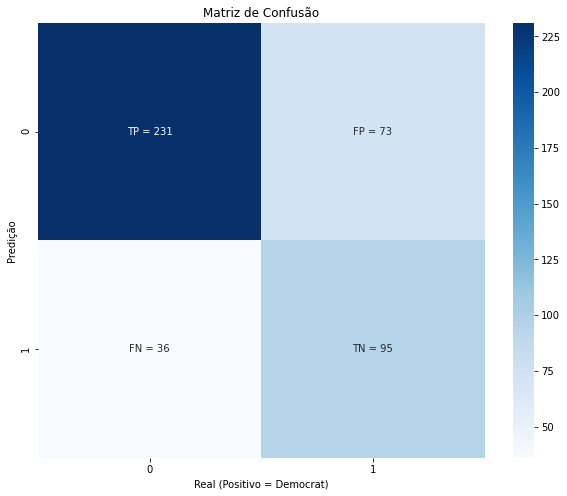

In [20]:
plt.figure(figsize=(10,8))

sns.heatmap(Matriz_de_Confusao, annot=(label) ,fmt='', cmap = 'Blues')
plt.title("Matriz de Confusão")
plt.xlabel('Real (Positivo = Democrat)')
plt.ylabel('Predição')
plt.savefig('Matriz_de_Confusao.png')
plt.show()
